In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#sns.set_style("dark")
#sns.set_style("whitegrid")

# Load Data

In [150]:
df = pd.read_csv('./data/glassdoor_cleaned.csv')
df.head(10)

,Rating,size,ownership,industry,sector,revenue,avg_salary,company_text,state,age,...,hive,deep_learning,nlp,cv,tensorflow,pytorch,keras,title_simple,seniority,description
0,4.5,201 to 500,Company - Private,others,Business Services,$25 to $50 million,86.0,Envision LLC,MO,26,...,0,0,0,0,0,0,0,data scientist,others,993
1,4.5,10000+,Company - Public,Internet,Information Technology,$5 to $10 billion,125.0,Facebook,DC,16,...,1,0,0,0,0,0,0,data scientist,others,4680
2,4.5,1 to 50,Company - Private,others,Business Services,$25 to $50 million,91.0,"TechSource, Inc.",NM,-1,...,0,0,0,0,0,0,0,others,others,5989
3,3.6,10000+,Subsidiary or Business Segment,IT Services,Information Technology,$10+ billion,75.5,General Dynamics Information Technology,VA,24,...,0,0,0,0,0,0,0,data engineer,others,3323
4,3.0,501 to 1000,Company - Public,others,others,$500 million to $1 billion,94.5,"Medifast, Inc.",MD,40,...,0,0,1,0,0,0,0,data scientist,senior,3126
5,3.5,1001 to 5000,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion,86.5,West Bend Mutual Insurance Company,WI,126,...,0,0,0,0,0,0,0,data engineer,others,1503
6,3.4,10000+,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion,89.5,GEICO,MD,84,...,0,0,0,0,0,0,0,data engineer,senior,3394
7,3.6,1001 to 5000,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,40.0,Children's Hospital & Medical Center,NE,72,...,0,0,0,0,0,0,0,data scientist,others,5348
8,3.6,10000+,Subsidiary or Business Segment,IT Services,Information Technology,$10+ billion,56.0,General Dynamics Information Technology,MD,24,...,0,0,0,0,0,0,0,data scientist,others,6389
9,3.6,501 to 1000,Company - Public,others,Finance,$100 to $500 million,132.0,Elevate Credit,TX,6,...,0,0,0,0,0,0,0,data scientist,senior,2739


In [282]:
df.columns = [x.lower() for x in df.columns.values]

# helper functions

# EDA

## Basic Info

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   rating         755 non-null    float64 
 1   size           755 non-null    object  
 2   ownership      755 non-null    object  
 3   industry       755 non-null    object  
 4   sector         755 non-null    object  
 5   revenue        755 non-null    object  
 6   avg_salary     755 non-null    float64 
 7   company_text   755 non-null    object  
 8   state          755 non-null    object  
 9   age            755 non-null    int64   
 10  sql            755 non-null    int64   
 11  python         755 non-null    int64   
 12  java           755 non-null    int64   
 13  sas            755 non-null    int64   
 14  matlab         755 non-null    int64   
 15  javascript     755 non-null    int64   
 16  c++            755 non-null    int64   
 17  scala          755 non-null    int6

In [284]:
df.describe()

,rating,avg_salary,age,sql,python,java,sas,matlab,javascript,c++,...,hadoop,spark,hive,deep_learning,nlp,cv,tensorflow,pytorch,keras,description
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,...,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,3.798940,111.049007,54.394702,0.468874,0.577483,0.190728,0.128477,0.084768,0.042384,0.076821,...,0.186755,0.209272,0.101987,0.099338,0.103311,0.029139,0.076821,0.042384,0.047682,4144.003974
std,0.526486,38.604825,65.100722,0.499361,0.494287,0.393136,0.334842,0.278721,0.201597,0.266484,...,0.389973,0.407058,0.302832,0.299313,0.304567,0.168308,0.266484,0.201597,0.213234,1707.837250
min,-1.000000,34.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000
25%,3.500000,86.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3079.500000
50%,3.800000,107.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3960.000000
75%,4.100000,133.250000,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5074.000000
max,5.000000,342.500000,338.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15962.000000


In [285]:
df.describe(include='O')

,size,ownership,industry,sector,revenue,company_text,state,title_simple,seniority
count,755,755,755,755,755,755,755,755,755
unique,8,6,14,14,13,380,36,4,5
top,10000+,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion,Takeda Pharmaceutical,CA,data scientist,others
freq,295,316,193,193,197,47,151,636,535


## Numeric Features

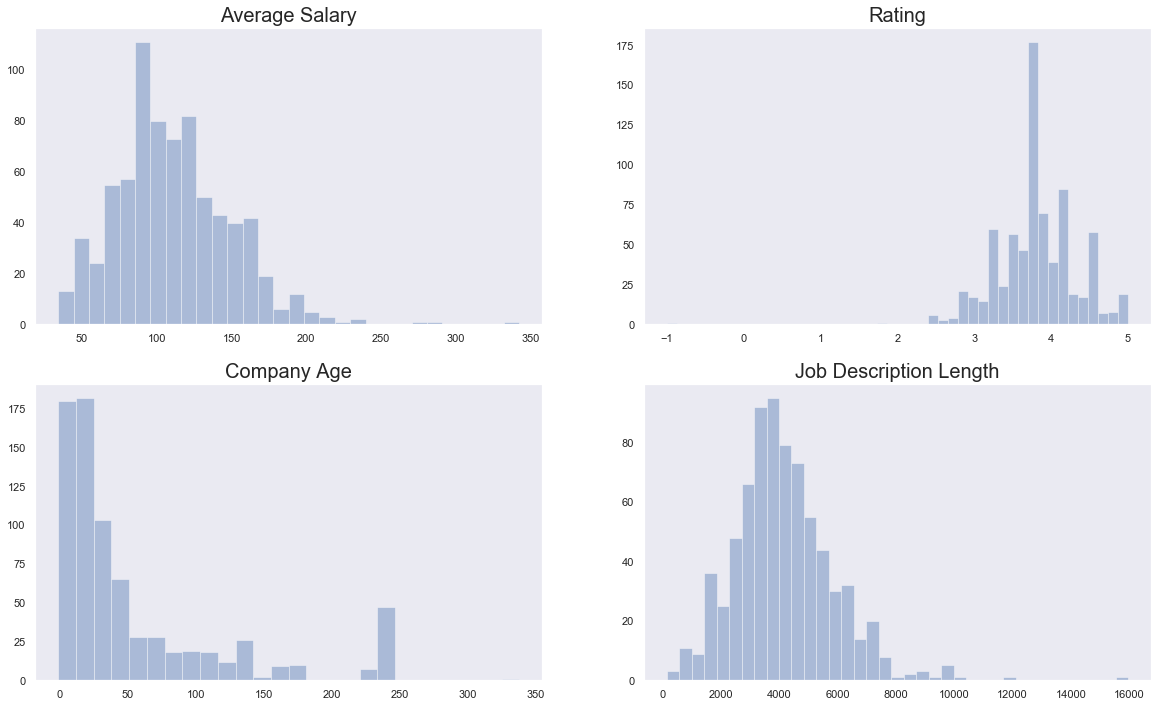

In [287]:
# Individual variables distribution
f,ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
sns.distplot(df['avg_salary'], kde=False, ax=ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].set_title('Average Salary', fontsize=20)

sns.distplot(df['rating'], kde=False, ax=ax[0,1])
ax[0,1].set_xlabel('')
ax[0,1].set_title('Rating', fontsize=20)

sns.distplot(df['age'], kde=False, ax=ax[1,0])
ax[1,0].set_xlabel('')
ax[1,0].set_title('Company Age', fontsize=20)

sns.distplot(df['description'], kde=False, ax=ax[1,1])
ax[1,1].set_xlabel('')
ax[1,1].set_title('Job Description Length', fontsize=20)

plt.show()

* Average salary, Rating, and Job description length are almost normally distributed
* Company age is right skewed, most company are fairly new, founded in last 50 years

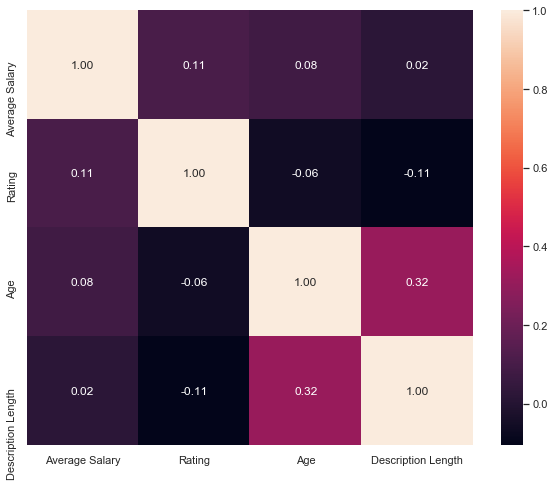

In [288]:
# Correlation between numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df[['avg_salary', 'rating', 'age', 'description']].corr(), annot=True, fmt = ".2f", \
            xticklabels=['Average Salary', 'Rating', 'Age', 'Description Length'], \
            yticklabels=['Average Salary', 'Rating', 'Age', 'Description Length'])

* avarage salary has some correlation with rating, not much with company age and description length
* job description age positively related to age
* rating is somehow negatively related with company age and job description length

(3, 4]     489
(4, 5]     213
(2, 3]      51
(1, 2]       1
(-2, 0]      1
(0, 1]       0
Name: rating_bin, dtype: int64


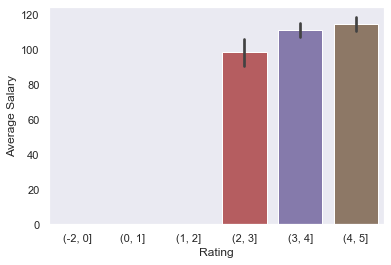

In [289]:
# avarage salary by rating groups
bins = [-2,0,1,2,3,4,5]
df['rating_bin'] = pd.cut(df['rating'], bins=bins)
print(df['rating_bin'].value_counts())
sns.barplot(x='rating_bin', y='avg_salary', data=df[df['rating']>2])
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()

(10, 20]      138
(20, 30]      120
(0, 10]       116
(30, 50]      104
(50, 100]      99
(100, 200]     86
(200, 500]     55
Name: age_bin, dtype: int64


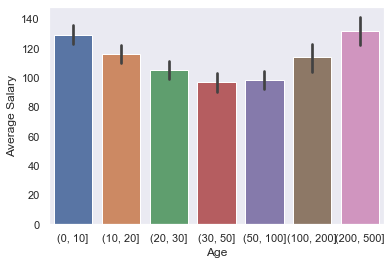

In [290]:
# avarage salary by age groups
bins = [0,10, 20,30, 50,100,200,500]
df['age_bin'] = pd.cut(df['age'], bins=bins)
print(df['age_bin'].value_counts())
sns.barplot(x='age_bin', y='avg_salary', data=df)
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.show()

* Relatively new and old companies have higher average salary

## Categorical Features

In [340]:
sns.set_style("dark")
def plot_bar_salary(col, figsize=(10, 6), rotate=False):
    """
    Print average salary by the group and the group count.
    col: column name
    figsize: figure size
    rotate: x axis label rotation angle
    """
    f, ax1 = plt.subplots(figsize=figsize)
    
    agg_data = df.groupby(col, as_index=False).agg({'avg_salary':['mean', 'count']})
    agg_data.columns = [col, 'Average Salary', 'Count']
    agg_data.sort_values(by='Average Salary', ascending=False, inplace=True)
    print(agg_data)
    
    sns.barplot(data=agg_data, x=col, y='Average Salary', ax=ax1, palette='Purples_d')
    ax2 = ax1.twinx() # This generates two separate y-axes that share the same x-axis.
    ax2.grid(False)
    sns.lineplot(data=agg_data, x=col, y='Count', ax=ax2, sort=False, color='yellow', marker='o')
    ax1.set_ylabel('Average Salary')
    ax1.set_title('Average Salary by {}'.format(col), fontsize=20)
    if rotate:
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotate, ha='right')
    ax2.set_ylabel('Count of {}'.format(col))
    ax2.set_ylim([0, None])

   state  Average Salary  Count
2     AZ      184.750000      2
3     CA      142.804636    151
5     CT      134.375000     20
14    MA      123.622340     94
26    NY      122.779070     43
22    NH      118.333333      3
11    IN      111.300000      5
9     GA      110.785714      7
6     DC      109.363636     22
17    MN      105.642857      7
31    TX      104.975610     41
23    NJ      102.793103     29
15    MD      100.869565     46
1     AR      100.500000      1
8     FL      100.428571     14
10    IL       98.243243     37
34    WA       94.810345     29
20    NC       91.416667     12
24    NM       91.000000      1
27    OH       90.933333     15
33    VA       90.896552     58
16    MI       90.535714     14
4     CO       89.800000      5
32    UT       87.566667     15
29    PA       87.350000     30
18    MO       84.937500     24
13    KY       79.500000      1
25    NV       79.250000      2
28    OR       78.833333      3
30    TN       77.666667      3
12    KS

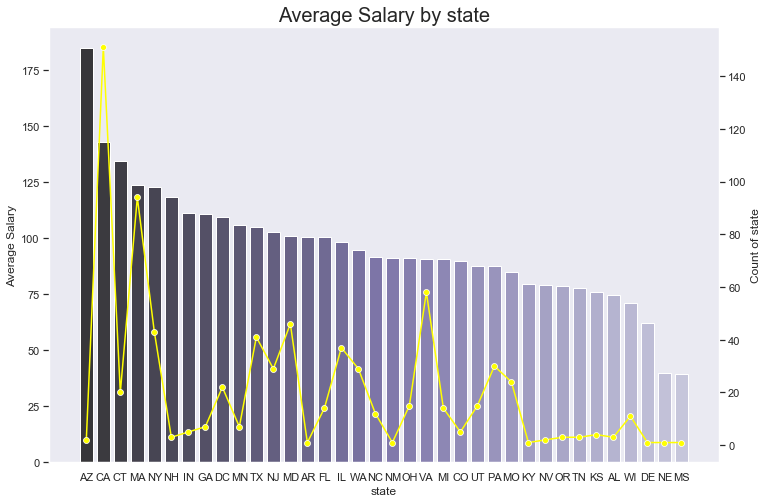

In [326]:
# averge salary by state
plot_bar_salary('state', figsize=(12, 8))

            size  Average Salary  Count
7        Unknown      144.250000     10
4  5001 to 10000      130.425926     54
3     201 to 500      113.355140    107
5    501 to 1000      111.395161     62
6      51 to 200      109.919192     99
1         10000+      109.015254    295
2   1001 to 5000      105.490385    104
0        1 to 50       96.187500     24


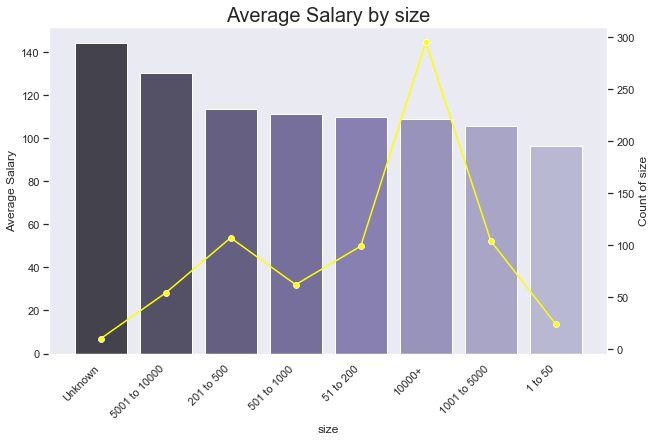

In [327]:
# average salary by size
plot_bar_salary('size', rotate=45)

* Start ups (size of 1-50) have the lowest average salary

                        ownership  Average Salary  Count
2                      Government      116.093750     16
0               Company - Private      114.869010    313
1                Company - Public      113.227848    316
3          Nonprofit Organization       97.223404     47
4  Subsidiary or Business Segment       92.614583     48
5                           other       82.366667     15


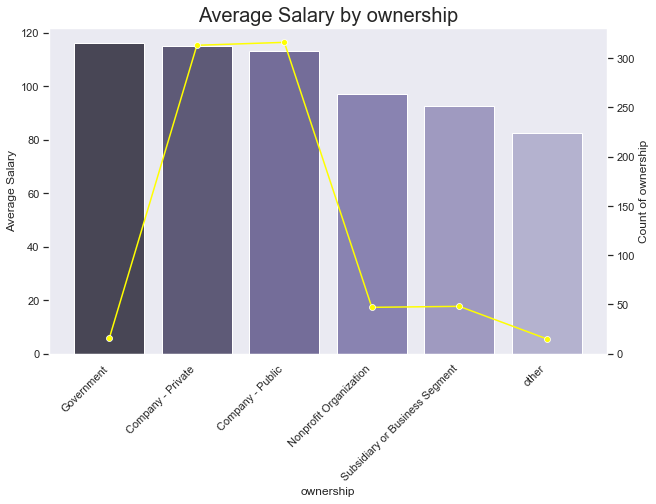

In [328]:
# average salary by ownership
plot_bar_salary('ownership', rotate=45)

                       revenue  Average Salary  Count
1             $1 to $5 million      126.933333     30
0             $1 to $2 billion      121.397436     39
10  $500 million to $1 billion      121.314286     35
3                 $10+ billion      120.659898    197
12    Unknown / Non-Applicable      116.829932    147
8            $5 to $10 million      113.409091     11
4         $100 to $500 million      106.206522     92
2           $10 to $25 million      105.781250     16
7            $5 to $10 billion      105.347222     36
6           $25 to $50 million      100.911765     34
9          $50 to $100 million       96.904762     42
11        Less than $1 million       89.735294     17
5             $2 to $5 billion       77.618644     59


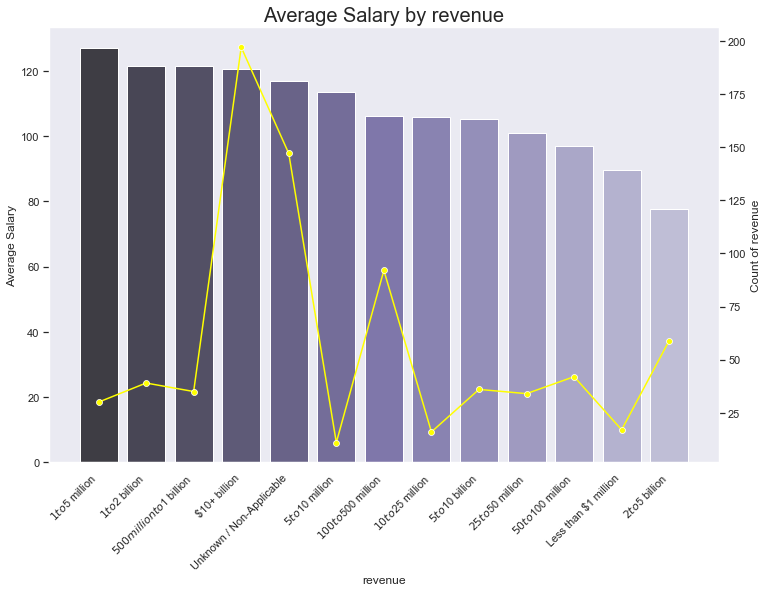

In [330]:
# average salary by revenue
plot_bar_salary('revenue', figsize=(12, 8), rotate=45)

   sql  Average Salary  Count
1    1      111.997175    354
0    0      110.211970    401
   python  Average Salary  Count
1       1      115.670872    436
0       0      104.731975    319
   java  Average Salary  Count
0     0      111.104746    611
1     1      110.812500    144
   sas  Average Salary  Count
0    0      112.100304    658
1    1      103.917526     97
   matlab  Average Salary  Count
1       1      111.132812     64
0       0      111.041245    691
   javascript  Average Salary  Count
0           0      111.226141    723
1           1      107.046875     32
   c++  Average Salary  Count
1    1      113.448276     58
0    0      110.849354    697
   scala  Average Salary  Count
1      1      119.154696    181
0      0      108.493031    574
   hadoop  Average Salary  Count
0       0      111.366450    614
1       1      109.666667    141
   spark  Average Salary  Count
1      1      116.041139    158
0      0      109.727806    597
   hive  Average Salary  Count
1     

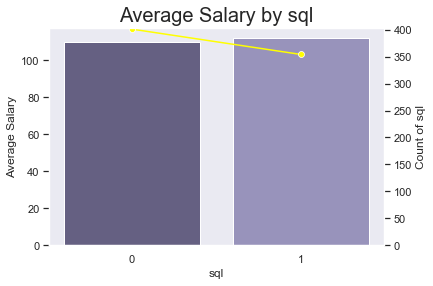

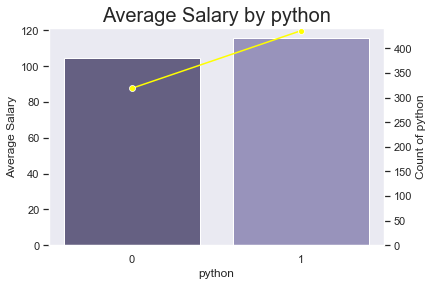

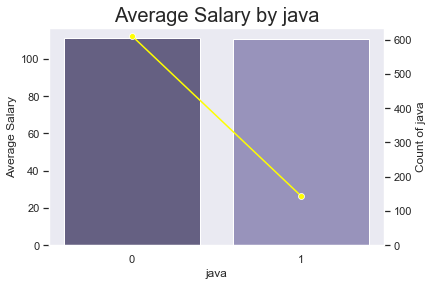

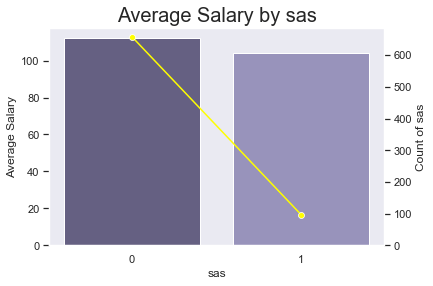

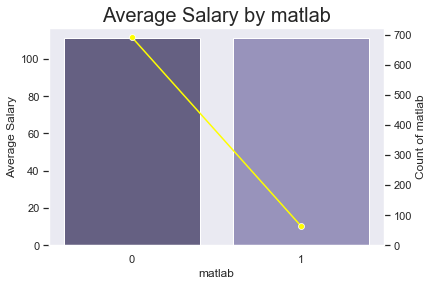

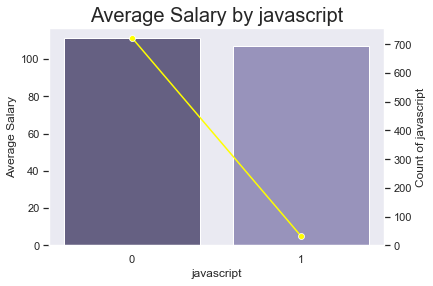

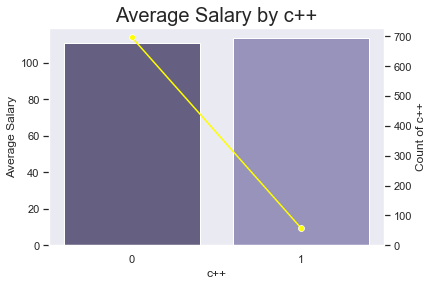

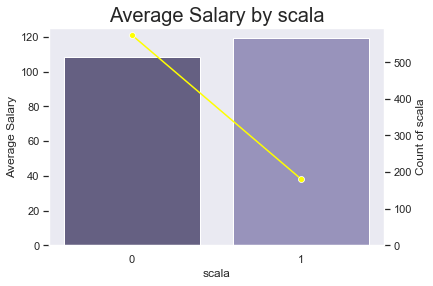

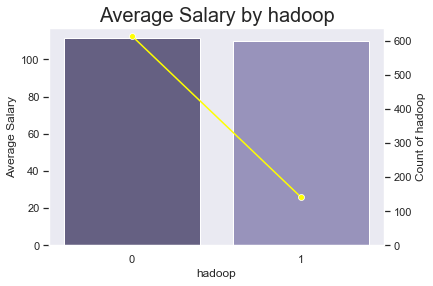

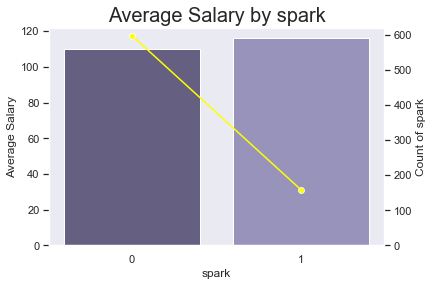

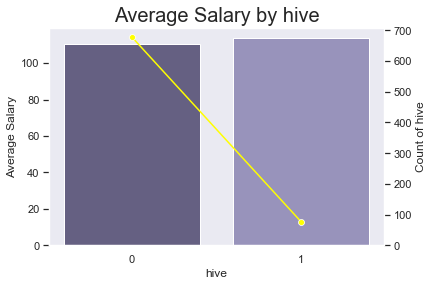

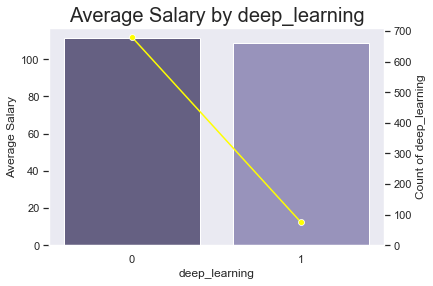

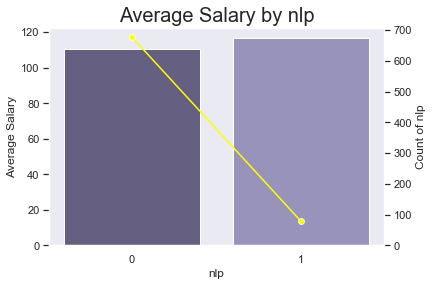

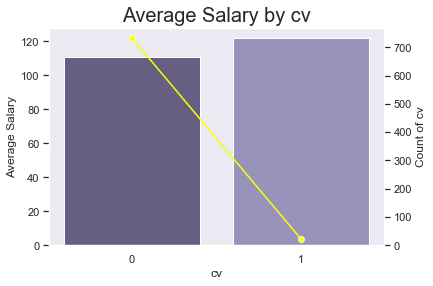

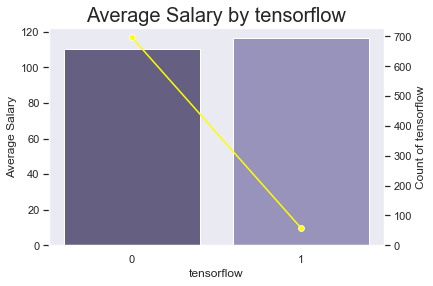

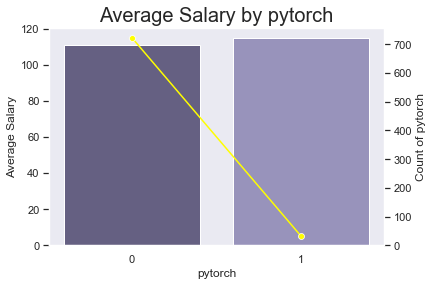

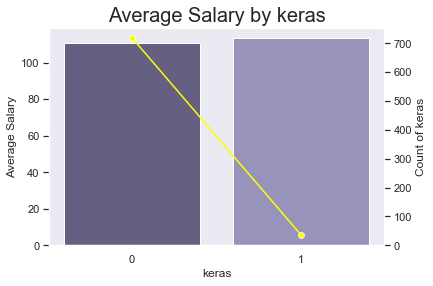

In [341]:
# average salary by skills
for col in ['sql', 'python', 'java',\
       'sas', 'matlab', 'javascript', 'c++', 'scala', 'hadoop', 'spark',\
       'hive', 'deep_learning', 'nlp', 'cv', 'tensorflow', 'pytorch', 'keras']:
    plot_bar_salary(col, figsize=(6,4))

     title_simple  Average Salary  Count
3          others      122.711538     26
2  data scientist      111.919811    636
1   data engineer      104.784884     86
0    data analyst       65.571429      7


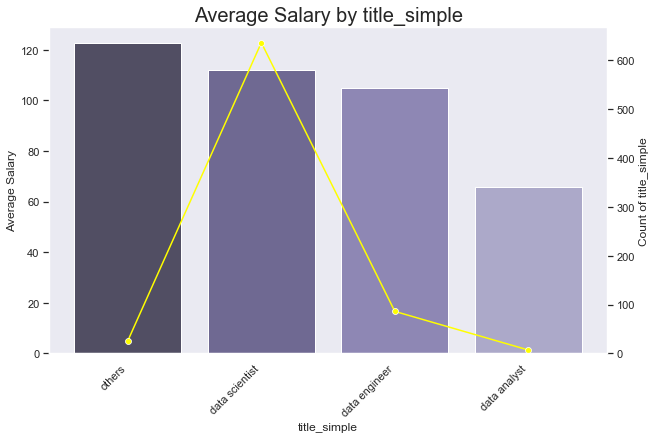

In [343]:
# average salary by title
plot_bar_salary('title_simple', rotate=45)

  seniority  Average Salary  Count
0  director      160.312500      8
4    senior      131.813107    206
2   manager      127.500000      4
3    others      102.342991    535
1    junior       71.250000      2


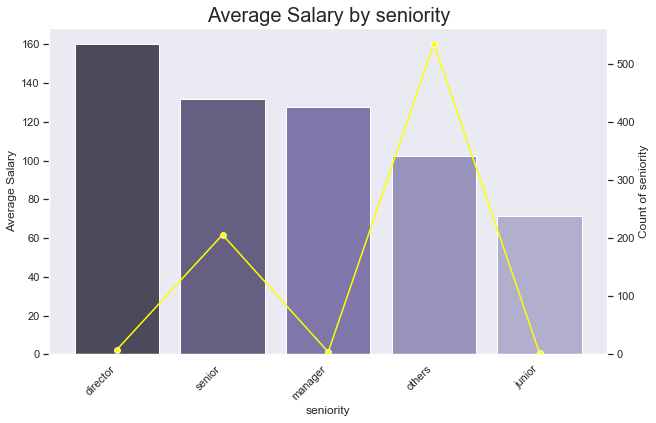

In [344]:
# average salary by revenue
plot_bar_salary('seniority', rotate=45)

# Export features

In [346]:
df.columns

Index(['rating', 'size', 'ownership', 'industry', 'sector', 'revenue',
       'avg_salary', 'company_text', 'state', 'age', 'sql', 'python', 'java',
       'sas', 'matlab', 'javascript', 'c++', 'scala', 'hadoop', 'spark',
       'hive', 'deep_learning', 'nlp', 'cv', 'tensorflow', 'pytorch', 'keras',
       'title_simple', 'seniority', 'description', 'rating_bin', 'age_bin'],
      dtype='object')